In [1]:
import pandas as pd
import json

#### Revise data

In [132]:
revised_v2 = pd.read_csv("data/counter_narrative/v2_seed.csv")['counter_text'].tolist()
revised_v3 = pd.read_csv("data/counter_narrative/v3_seed.csv")['counter_text'].tolist()
revised_v4 = pd.read_csv("data/counter_narrative/v4_seed.csv")['counter_text'].tolist()
revised_v5 = pd.read_csv("data/counter_narrative/v5_seed.csv")['counter_text'].tolist()

#### Novalty

In [8]:
# === Step 1: 读取 JSON 数据 ===
with open("data/counter_narrative/cn_50_evaluation_results.json", "r", encoding="utf-8") as f:
    evaluation_results = json.load(f)

# === Step 2: 提取每个 counter 各维度评分并计算每行平均 ===
rows = []

for item in evaluation_results:
    filename = item.get("filename", "unknown")
    counters = item["counters"]

    for counter_type, criteria in counters.items():
        row = {
            "filename": filename,
            "counter_type": counter_type
        }

        total = 0
        count = 0

        for dim, info in criteria.items():
            score = info["score"]
            row[dim] = score
            total += score
            count += 1

        row["Counter_Avg"] = round(total / count, 2)
        rows.append(row)

# === Step 3: 构建 DataFrame ===
df = pd.DataFrame(rows)
df.fillna(0, inplace=True)

# === Step 4: 保存为 CSV 文件 ===
df.to_csv("data/counter_narrative/evaluation_score_table.csv", index=False)
print("✅ 已保存评分表格为 evaluation_score_table.csv")

# === Step 5: 计算全局统计信息 ===

# 每个评分维度的全局平均分
dimension_columns = ["Specificity", "Opposition", "Relatedness", "Toxicity", "Fluency"]
dimension_avg = df[dimension_columns].mean().round(2)

# 每个 counter_type 的平均 Counter_Avg
counter_avg_by_type = df.groupby("counter_type")["Counter_Avg"].mean().round(2)

# === Step 6: 打印全局统计结果 ===
print("\n📊 每个评分维度的全局平均分：")
for dim, val in dimension_avg.items():
    print(f"{dim}: {val}")

print("\n📊 每种 Counter 类型的平均得分：")
for counter_type, val in counter_avg_by_type.items():
    print(f"{counter_type}: {val}")

✅ 已保存评分表格为 evaluation_score_table.csv

📊 每个评分维度的全局平均分：
Specificity: 3.46
Opposition: 4.08
Relatedness: 4.41
Toxicity: 4.97
Fluency: 5.0

📊 每种 Counter 类型的平均得分：
Counter Question: 4.49
Empathy-based Counter Narrative: 4.34
Fact-Based Counter-Narrative: 4.39
Humor and Sarcasm: 4.05
Positive Response: 4.38
Warning/Denouncing Response: 4.66


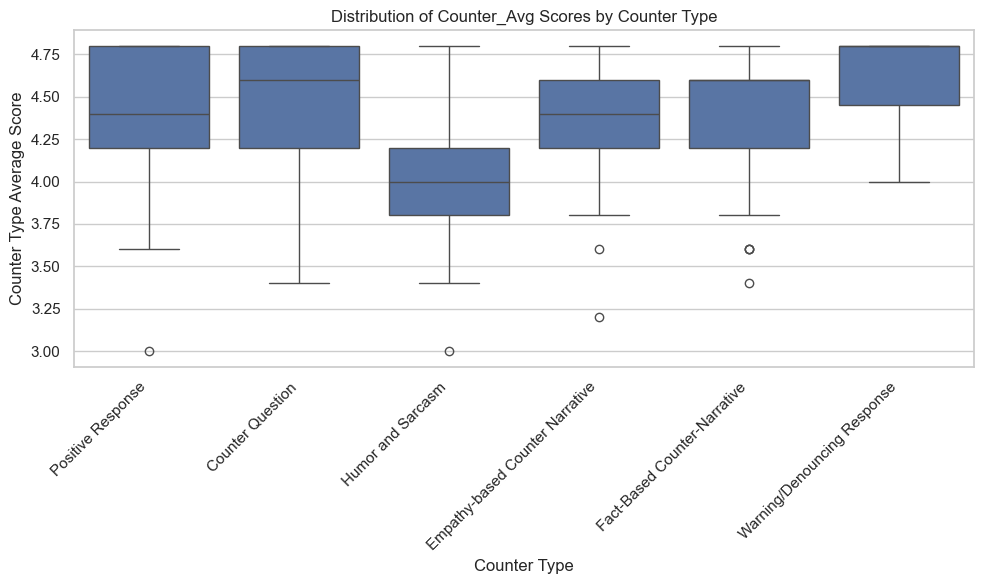

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/counter_narrative/evaluation_score_table.csv")

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x="counter_type", y="Counter_Avg", data=df)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Counter Type Average Scores by Counter Type")
plt.ylabel("Counter_Avg Score")
plt.xlabel("Counter Type")
plt.tight_layout()
plt.show()

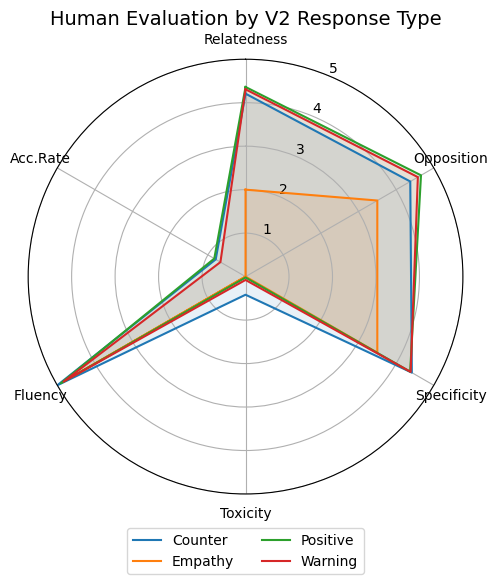

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 定义维度标签
labels = ['Relatedness', 'Opposition', 'Specificity','Toxicity', 'Fluency', 'Acc.Rate']
num_vars = len(labels)

# 2. 定义每个风格的数据（注意最后一个元素与第一个相同，闭合图形）
data = {
    'Counter':  [4.208, 4.375, 4.417, 5-4.583, 5.000, 0.792],
    'Empathy':  [2.000, 3.500, 3.500, 0.000, 4.500, 0.000],
    'Positive': [4.362, 4.660, 4.372, 5-4.979, 4.904, 0.830],
    'Warning':  [4.308, 4.577, 4.385, 5-4.923, 4.833, 0.667]
}

# 3. 设置雷达图角度
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 闭合雷达图

# 4. 创建画布
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 5. 绘制每个风格的数据线
for style, values in data.items():
    stats = values + values[:1]  # 闭合雷达图路径
    ax.plot(angles, stats, label=style)
    ax.fill(angles, stats, alpha=0.1)

# 6. 设置标签与标题
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Human Evaluation by V2 Response Type", fontsize=14)
ax.set_ylim(0, 5)  # y轴范围设为0~5.5以容纳AR部分

# 7. 添加图例
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.show()


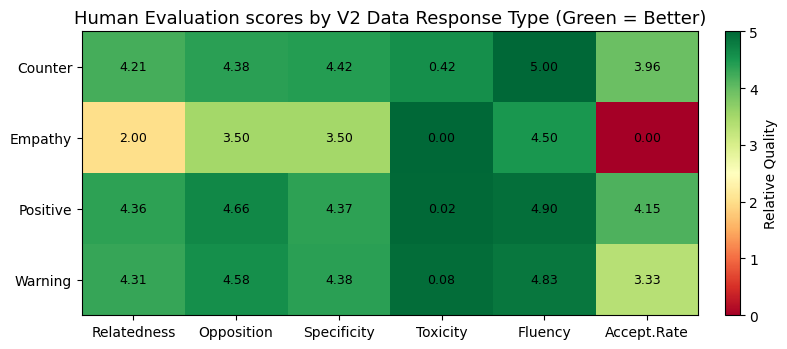

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 维度标签
labels = ['Relatedness', 'Opposition', 'Specificity','Toxicity', 'Fluency', 'Accept.Rate']

# 2. 数据（T 是 5 - 原始毒性）
data = {
    'Counter':  [4.208, 4.375, 4.417, 5 - 4.583, 5.000, 0.792],
    'Empathy':  [2.000, 3.500, 3.500, 0.000, 4.500, 0.000],
    'Positive': [4.362, 4.660, 4.372, 5 - 4.979, 4.904, 0.830],
    'Warning':  [4.308, 4.577, 4.385, 5 - 4.923, 4.833, 0.667]
}

# 3. Acc.Rate 放大到 0~5
proc = {k: v[:-1] + [v[-1] * 5] for k, v in data.items()}

# 4. 转成矩阵
styles = list(proc.keys())
data_array = np.array([proc[s] for s in styles])

# 5. 颜色映射专用矩阵（只反转 T 列的值）
color_data = data_array.copy()
tox_col = labels.index('Toxicity')
color_data[:, tox_col] = 5 - color_data[:, tox_col]  # 反转方向

# 6. 绘制热力图
fig, ax = plt.subplots(figsize=(8, 3.6))
im = ax.imshow(color_data, aspect='auto', vmin=0, vmax=5, cmap='RdYlGn')  # 绿好红差

# 7. 坐标与标题
ax.set_yticks(np.arange(len(styles)), labels=styles)
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_title("Human Evaluation scores by V2 Data Response Type (Green = Better)", fontsize=13)

# 8. 标注显示原始分值
for i in range(data_array.shape[0]):
    for j in range(data_array.shape[1]):
        ax.text(j, i, f"{data_array[i, j]:.2f}", ha='center', va='center', fontsize=9, color='black')

# 9. 颜色条
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Relative Quality", rotation=90)

plt.tight_layout()
plt.show()


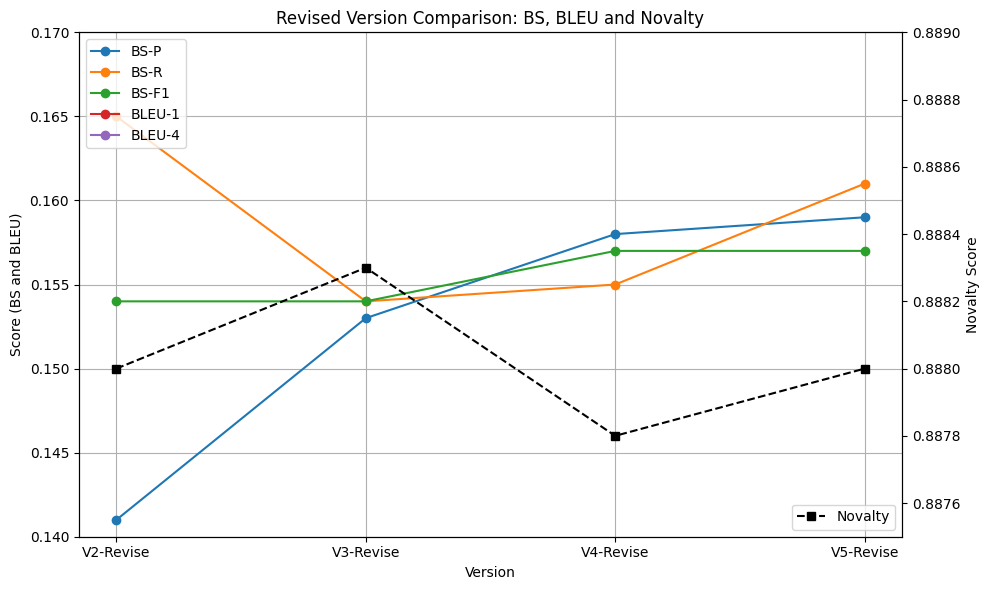

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据
data = {
    'Version': ['V2-Revise', 'V3-Revise', 'V4-Revise', 'V5-Revise'],
    'BS-P': [0.141, 0.153, 0.158, 0.159],
    'BS-R': [0.165, 0.154, 0.155, 0.161],
    'BS-F1': [0.154, 0.154, 0.157, 0.157],
    'BLEU-1': [0.197, 0.207, 0.205, 0.205],
    'BLEU-4': [0.020, 0.018, 0.018, 0.019],
    'Novalty': [0.8880, 0.8883, 0.8878, 0.8880]
}
df = pd.DataFrame(data)

# 主图
fig, ax1 = plt.subplots(figsize=(10, 6))

metrics = ['BS-P', 'BS-R', 'BS-F1', 'BLEU-1', 'BLEU-4']
for metric in metrics:
    ax1.plot(df['Version'], df[metric], marker='o', label=metric)

ax1.set_xlabel('Version')
ax1.set_ylabel('Score (BS and BLEU)')
ax1.set_ylim(0.14, 0.17)
ax1.legend(loc='upper left')
ax1.grid(True)

# 添加副轴用于 Novalty
ax2 = ax1.twinx()
ax2.plot(df['Version'], df['Novalty'], marker='s', color='black', linestyle='--', label='Novalty')
ax2.set_ylabel('Novalty Score')
ax2.set_ylim(0.8875, 0.889)
ax2.legend(loc='lower right')

plt.title('Revised Version Comparison: BS, BLEU and Novalty')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [146]:
import matplotlib.font_manager as fm
print([f.name for f in fm.fontManager.ttflist if "PingFang" in f.name])

['PingFang HK', 'PingFang HK', 'PingFang HK']
